# Machine Learning Major Project

In this project I use PCA to show that unfortunately biologically realistic data and models are still seperable.

Rationale I use python with dask and numba to save time, although Julia perhaps better long term solution, although I use that elsewhere.

If biologically realistic models where a better imitation of real experimental cells, then data and models would not be seperable, by plotting onto a high dimensional feature space we show that data and models are seperable.

We then use random forest regression to find out which dimensions explain the most variance.

In [1]:
import os
import dask.dataframe as dd    
# Common stuff to import
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd
os.getcwd()

'/Users/rjjarvis/git/safe/neuronunit/neuronunit/examples'

In [2]:
#help(df)

with open('dm_on_models.p','rb') as f:
    (RAW_dtc,ADEXP_dtc) = pickle.load(f)
# Impute remaining missing values with 0.
#

/Users/rjjarvis/git/safe/neuronunit/neuronunit/optimisation/optimization_management.py:8: UserWarning: X11 plotting backend not available, consider installing
  warnings.warn('X11 plotting backend not available, consider installing')


consider installing pynn a heavier backend
Could not load HHBackend.
pynn python Error


In [3]:
# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [4]:
cwd = os.getcwd()
path2data = os.path.join(cwd,'data')

In [5]:
standard = 0
strong = 0
easy_map = [
            {'AP12AmplitudeDropTest':standard},
            {'AP1SSAmplitudeChangeTest':standard},
            {'AP1AmplitudeTest':standard},
            {'AP1WidthHalfHeightTest':standard},
            {'AP1WidthPeakToTroughTest':standard},
            {'AP1RateOfChangePeakToTroughTest':standard},
            {'AP1AHPDepthTest':standard},
            {'AP2AmplitudeTest':standard},
            {'AP2WidthHalfHeightTest':standard},
            {'AP2WidthPeakToTroughTest':standard},
            {'AP2RateOfChangePeakToTroughTest':standard},
            {'AP2AHPDepthTest':standard},
            {'AP12AmplitudeChangePercentTest':standard},
            {'AP12HalfWidthChangePercentTest':standard},
            {'AP12RateOfChangePeakToTroughPercentChangeTest':standard},
            {'AP12AHPDepthPercentChangeTest':standard},
            {'InputResistanceTest':str('ir_currents')},
            {'AP1DelayMeanTest':standard},
            {'AP1DelaySDTest':standard},
            {'AP2DelayMeanTest':standard},
            {'AP2DelaySDTest':standard},
            {'Burst1ISIMeanTest':standard},
            {'Burst1ISISDTest':standard},
            {'InitialAccommodationMeanTest':standard},
            {'SSAccommodationMeanTest':standard},
            {'AccommodationRateToSSTest':standard},
            {'AccommodationAtSSMeanTest':standard},
            {'AccommodationRateMeanAtSSTest':standard},
            {'ISICVTest':standard},
            {'ISIMedianTest':standard},
            {'ISIBurstMeanChangeTest':standard},
            {'SpikeRateStrongStimTest':strong},
            {'AP1DelayMeanStrongStimTest':strong},
            {'AP1DelaySDStrongStimTest':strong},
            {'AP2DelayMeanStrongStimTest':strong},
            {'AP2DelaySDStrongStimTest':strong},
            {'Burst1ISIMeanStrongStimTest':strong},
            {'Burst1ISISDStrongStimTest':strong},
        ]



# Load and clean data in one cell

In [6]:
# Open the 1.5x rheobase file
filename = os.path.join(cwd,'onefive_df.pkl')
with open(filename, 'rb') as f:
    df = pickle.load(f)

    # A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
%time df = df.fillna(0).applymap(f)
#df_30x = df_30x.fillna(0).applymap(f)
df.head()

df
df_dask = dd.from_pandas(df.T, npartitions=8)#, chunksize=8)    
#df_30x = df_30x.fillna(0).applymap(f)

#for i in df.columns:
#    print(i)
    
#dir(df_dask)#.persist()#.compute()


CPU times: user 29.3 s, sys: 304 ms, total: 29.6 s
Wall time: 29.7 s


In [7]:
% time df_dask = df_dask.fillna(0).applymap(f)

CPU times: user 5.56 s, sys: 41.7 ms, total: 5.6 s
Wall time: 5.63 s


In [8]:
dm_labels = [list(keys.keys())[0] for keys in easy_map ]
keep_columns = []
for l in easy_map:
    for k in l.keys():
        if str(k)+str('_3.0x') in df.columns:
            keep_columns.append(str(k)+str('_3.0x'))
        elif str(k)+str('_1.5x') in df.columns:
            keep_columns.append(str(k)+str('_1.5x'))

df1 = pd.DataFrame(df,columns=keep_columns)
df = df1
df.head()

,AP12AmplitudeDropTest_3.0x,AP1SSAmplitudeChangeTest_3.0x,AP1AmplitudeTest_3.0x,AP1WidthHalfHeightTest_3.0x,AP1WidthPeakToTroughTest_3.0x,AP1RateOfChangePeakToTroughTest_3.0x,AP1AHPDepthTest_3.0x,AP2AmplitudeTest_3.0x,AP2WidthHalfHeightTest_3.0x,AP2WidthPeakToTroughTest_3.0x,...,ISICVTest_3.0x,ISIMedianTest_3.0x,ISIBurstMeanChangeTest_3.0x,SpikeRateStrongStimTest_3.0x,AP1DelayMeanStrongStimTest_3.0x,AP1DelaySDStrongStimTest_3.0x,AP2DelayMeanStrongStimTest_3.0x,AP2DelaySDStrongStimTest_3.0x,Burst1ISIMeanStrongStimTest_3.0x,Burst1ISISDStrongStimTest_3.0x
313861539,0.009156,0.005390,0.037937,0.120,0.460,-0.182133,0.045844,0.028781,0.155,0.56,...,0.311657,10.235,-98.819898,47.0,22.710,0.0,607.405,1.136868e-13,295.7975,5.684342e-14
313861677,0.001219,0.000000,0.064875,0.685,10.035,-0.009834,0.033813,0.063656,0.785,0.00,...,2.516959,66.200,15.416833,3.0,53.410,0.0,103.550,0.000000e+00,54.0050,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,-0.000125,-0.000290,0.018000,0.235,1.915,-0.032050,0.043375,0.018125,0.250,0.00,...,10.784342,51.390,8.857865,19.0,52.225,0.0,93.770,0.000000e+00,43.3850,0.000000e+00
313862167,58.906250,33.244049,58.906250,0.200,0.000,0.000000,0.000000,0.000000,0.000,1.55,...,0.000000,0.000,0.000000,52.0,30.980,0.0,44.965,0.000000e+00,14.4050,0.000000e+00


In [9]:
df.shape

(7285, 38)

In [10]:
for l in easy_map:
    for k in l.keys():
        if str(k)+str('_1.5x') in df.columns:
            df.rename(columns={str(k)+str('_1.5x'):str(k)}, inplace=True)

for l in easy_map:
    for k in l.keys():
        if str(k)+str('_3.0x') in df.columns: 
            df.rename(columns={str(k)+str('_3.0x'):str(k)}, inplace=True)


for k in RAW_dtc.keys():
    temp0 = pd.DataFrame(RAW_dtc[k][0].dm_test_features)
    sub_df = df[temp0.columns]
    break
    

cnt=0
for k in RAW_dtc.keys():
    temp0 = pd.DataFrame(RAW_dtc[k][0].dm_test_features)
    temp0.rename(index={0:str(k)+str(' fe_izhi')},inplace=True)
    temp1 = pd.DataFrame(ADEXP_dtc[k][0].dm_test_features)
    temp1.rename(index={0:str(k)+str(' adexp')},inplace=True)
    #display(temp1)
    #sub_df = sub_df.append(temp0)
    #sub_df = sub_df.append(temp1)
    
    sub_df = pd.concat([temp0, sub_df])#, ignore_index=True)
    sub_df = pd.concat([temp1, sub_df])#, ignore_index=True)

    cnt+=1

df = sub_df

In [11]:
sub_df.head()
size=cnt*2
print(size)
#RAW_dtc.keys()

10


In [12]:
#df = df[any(keep_columns) in df]
df



,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
Hippocampus CA1 basket cell adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.00,...,4.000,0.000000,269.5,3.000,0.0,5.000,0.0,2.0000,0.0,0.000031
Hippocampus CA1 basket cell fe_izhi,0.000011,0.000017,0.069998,0.705,36.945,-0.002727,0.030769,0.069986,0.71,24.32,...,95.575,-4.753126,34.5,10.920,0.0,20.260,0.0,11.7875,0.0,0.024167
Neocortex pyramidal cell layer 5-6 adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.00,...,4.000,0.000000,269.5,3.000,0.0,5.000,0.0,2.0000,0.0,0.000031
Neocortex pyramidal cell layer 5-6 fe_izhi,-0.000014,-0.000051,0.069881,0.280,12.500,-0.009758,0.052092,0.069895,0.28,12.33,...,85.600,1.349831,33.5,9.465,0.0,21.935,0.0,22.8625,0.0,0.061077
Hippocampus CA1 pyramidal cell adexp,0.000000,NaN,NaN,NaN,0.000,-117.375000,0.117375,NaN,NaN,0.00,...,4.000,0.000000,269.5,3.000,0.0,5.000,0.0,2.0000,0.0,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NMLCL001594,5.680001,2.950002,91.974881,0.730,5.120,-21.791169,19.595903,86.294880,0.78,5.83,...,21.900,1.952036,90.0,3.200,0.0,14.170,0.0,9.9150,0.0,71.106876
NMLCL001650,0.024598,-0.008493,54.980529,7.600,0.020,-4249.188178,30.003234,54.955931,7.61,0.02,...,151.120,0.026476,10.5,98.750,0.0,191.130,0.0,92.4450,0.0,64.812843
NMLCL001657,0.053719,0.031047,60.009550,5.830,16.540,-5.688753,34.082421,59.955830,5.84,17.05,...,219.300,0.091283,9.5,66.310,0.0,169.570,0.0,104.2250,0.0,38.619367
NMLCL001660,0.039358,-0.776942,9.128643,0.320,0.010,-10587.879650,96.750154,9.089285,0.32,25.84,...,164.770,39.802715,17.5,59.350,0.0,103.710,0.0,46.7950,0.0,21.387796


In [13]:
#import dask.dataframe as dd

df.iloc[0][192:195]


if 'InputResistanceTest_1.5x' in df.columns:
    # in order to find out what is seperating and what is not.
    del df['InputResistanceTest_1.5x']
    del df['InputResistanceTest_3.0x']
    del df['ohmic_input_resistance_1.5x']
    del df['ohmic_input_resistance_3.0x']
    del df['time_1.5x']                              
    #       0.190362
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    #0.198310
    del df['is_not_stuck_1.5x']
    del df['AHP_depth_abs_1.5x']



In [14]:
df.tail()

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
NMLCL001594,5.680001,2.950002,91.974881,0.73,5.12,-21.791169,19.595903,86.294880,0.78,5.83,...,21.90,1.952036,90.0,3.20,0.0,14.17,0.0,9.915,0.0,71.106876
NMLCL001650,0.024598,-0.008493,54.980529,7.60,0.02,-4249.188178,30.003234,54.955931,7.61,0.02,...,151.12,0.026476,10.5,98.75,0.0,191.13,0.0,92.445,0.0,64.812843
NMLCL001657,0.053719,0.031047,60.009550,5.83,16.54,-5.688753,34.082421,59.955830,5.84,17.05,...,219.30,0.091283,9.5,66.31,0.0,169.57,0.0,104.225,0.0,38.619367
NMLCL001660,0.039358,-0.776942,9.128643,0.32,0.01,-10587.879650,96.750154,9.089285,0.32,25.84,...,164.77,39.802715,17.5,59.35,0.0,103.71,0.0,46.795,0.0,21.387796
NMLCL001663,0.024598,-0.008493,54.980529,7.60,0.02,-4249.188178,30.003234,54.955931,7.61,0.02,...,151.12,0.026476,10.5,98.75,0.0,191.13,0.0,92.445,0.0,64.812843


In [15]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
#df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            print(x)
            raise e
df = df.fillna(0)

In [16]:
print("There are %d models+data and %d features" % df.shape)
#print("There are %d models+data and %d features" % dask_frame.shape)

There are 7295 models+data and 38 features


# The data frame is big.
*lets experiment with dask -lazy pandas array to avoid storing it all in memory, and to do CPU-block-mapped operations in partitions 

In [17]:
%%capture
# Impute remaining missing values with 0.

dask_frame = dd.from_pandas(df.T,npartitions=8)
#%time dask_frame.size
#%time dask_frame.drop_duplicates

In [ ]:
df.size;
df.drop_duplicates;

In [19]:

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)


1420


In [20]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)
df.groupby(df.index).first()
df = pd.DataFrame.drop_duplicates(df)



1420


In [21]:
#df.index[0:50]

In [22]:
# Check to see what is there.  Might also check to see if there is data there.
#df_30x#.head()

# make model dataframe

model_idx2 = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
model_no_trans_df2 = df[df.index.isin(model_idx2)]
model_no_trans_df2.index.name = 'OptCells'
model_df2 = model_no_trans_df2.copy()
model_df2.index.name = 'OptCells'

model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
#print(len(experiment_df))
model_df2
model_no_trans_df2

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
OptCells,,,,,,,,,,,,,,,,,,,,,
Hippocampus CA1 basket cell adexp,-0.170394,-0.475033,-1.527886,-0.291318,-0.597650,-0.137352,-1.155569,-1.509806,-0.273996,-0.565781,...,-0.683607,-0.083516,6.925665,-0.331191,-0.120591,-0.358202,-0.172017,-0.402422,-0.15436,-0.873915
Hippocampus CA1 basket cell fe_izhi,-0.170392,-0.475030,-1.525864,-0.032147,2.917630,0.079041,-1.163965,-1.507739,0.005858,1.804355,...,-0.033854,-0.091248,0.190579,-0.281145,-0.120591,-0.281712,-0.172017,-0.286881,-0.15436,-0.873854
Neocortex pyramidal cell layer 5-6 fe_izhi,-0.170395,-0.475044,-1.525867,-0.188385,0.591712,0.079028,-1.161898,-1.507741,-0.163631,0.635854,...,-0.104630,-0.081320,0.161919,-0.290339,-0.120591,-0.273316,-0.172017,-0.156140,-0.15436,-0.873761
Olfactory bulb (main) mitral cell adexp,-0.170394,-0.475033,-1.527886,-0.291318,-0.597650,-0.137352,-1.155569,-1.509806,-0.273996,-0.565781,...,-0.683607,-0.083516,6.925665,-0.331191,-0.120591,-0.358202,-0.172017,-0.402422,-0.15436,-0.873915
Olfactory bulb (main) mitral cell fe_izhi,-0.170396,-0.475037,-1.525865,0.160852,0.305314,0.079025,-1.163013,-1.507739,0.230530,0.871211,...,-0.135920,-0.052845,0.434188,-0.290434,-0.120591,-0.273868,-0.172017,-0.257840,-0.15436,-0.873851
Cerebellum Purkinje cell adexp,-0.170394,-0.475033,-1.527886,-0.291318,-0.597650,-0.021663,-1.161653,-1.509806,-0.273996,-0.565781,...,-0.697797,-0.083516,7.083295,-0.337510,-0.120591,-0.363214,-0.172017,-0.402422,-0.15436,-0.873915
Cerebellum Purkinje cell fe_izhi,-0.170394,-0.475033,-1.526587,-0.155299,-0.597650,-31.262925,-1.163067,-1.509806,-0.273996,-0.565781,...,-0.711988,-0.083516,-0.511590,-0.262662,-0.120591,-0.137555,-0.172017,0.318420,-0.15436,-0.873789


In [23]:
#print(len(experiment_df))
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
#experiment_df.index
experiment_df.groupby(experiment_df.index).first()
len(experiment_df)

448

In [24]:
print(len(model_df))
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()
len(model_df)

972


972

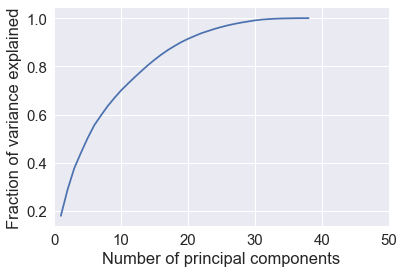

In [25]:
# Do PCA and look at variance explained
pca = PCA()
pca.fit(df.values)
n_features = df.shape[1]
plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');

In [26]:
# THe transformed values, ordered from highest to lowest variance dimensions
transformed = pca.transform(df.values)


#model_idx = [idx for idx in enumerate(df.index.values) if type(idx)==str]
'''
#label_model_no_trans_df
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'
'''
# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

#model_df
#df.labels
model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels


new_models = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
new_model_labels= df.index.isin(new_models)

<Figure size 432x288 with 0 Axes>

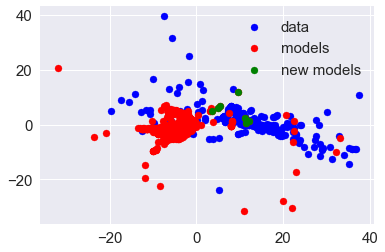

In [27]:
# Do an isomap embedding in 2 dimensions
isomap = Isomap(n_components=2)
isomap.fit(df.values)
iso = isomap.embedding_.T
# Plot that isomap embedding. Each is a model (or a cell, for data)
#plt.scatter(iso);
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='green',cmap='rainbow',label='new models')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
# I don't love the isomap fit

<Figure size 432x288 with 0 Axes>

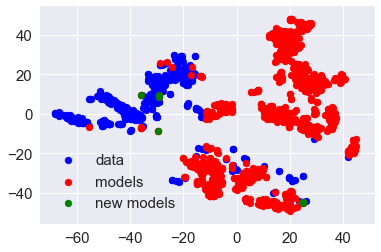

In [28]:
# Do a TSNE embedding in two dimensions
tsne = TSNE(n_components=2, perplexity=30)
tsne.fit(df.values)
x = tsne.embedding_.T
#np.shape(x)
#print(experiment_idx)
# Plot that TSNE embedding. Each is a model (or a cell, for data)
plt.clf()
fig = plt.figure()
ax = plt.subplot(111)
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(x[0,model_index_labels],x[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(x[0,new_model_labels],x[1,new_model_labels],c='green',cmap='rainbow',label='new models')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")


* We can examine the dimension that contributes the most to cluster seperation  by looking at variance explained.


In [29]:
#df_data = pd.read_csv(...)
#df_models = pd.read_csv(...)
from sklearn.ensemble import RandomForestClassifier

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat((df_data, df_models))
#target = np.array([0]*df_models.shape[0] + [1]*df_data.shape[1])
target = np.array(df.index.isin(experiment_idx))

print(np.shape(df_combined))
print(np.shape(target))

rfc = RandomForestClassifier()
rfc.fit(df_combined.values, target)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
importances.sort_values(ascending=False)
#rfc.feature_importances_

(1420, 38)
(1420,)


InputResistanceTest                              0.242386
AP1AmplitudeTest                                 0.241592
AP1AHPDepthTest                                  0.113793
AP1DelayMeanTest                                 0.098475
AP2WidthPeakToTroughTest                         0.059320
InitialAccommodationMeanTest                     0.047956
AccommodationRateToSSTest                        0.045292
AP2AmplitudeTest                                 0.038430
ISIMedianTest                                    0.028161
AccommodationAtSSMeanTest                        0.023015
AP1DelayMeanStrongStimTest                       0.021989
Burst1ISIMeanTest                                0.010558
AP2DelayMeanTest                                 0.006573
AP2AHPDepthTest                                  0.004485
SpikeRateStrongStimTest                          0.003730
AP1WidthHalfHeightTest                           0.002612
AP1SSAmplitudeChangeTest                         0.002337
ISIBurstMeanCh

In [30]:
#np.shape(x)
#x[0,:]
#X[1,:]

CPU times: user 6.66 s, sys: 313 ms, total: 6.97 s
Wall time: 6.99 s
CPU times: user 7.11 s, sys: 319 ms, total: 7.43 s
Wall time: 7.29 s
CPU times: user 7.32 s, sys: 317 ms, total: 7.64 s
Wall time: 7.47 s
CPU times: user 7.47 s, sys: 307 ms, total: 7.78 s
Wall time: 7.6 s


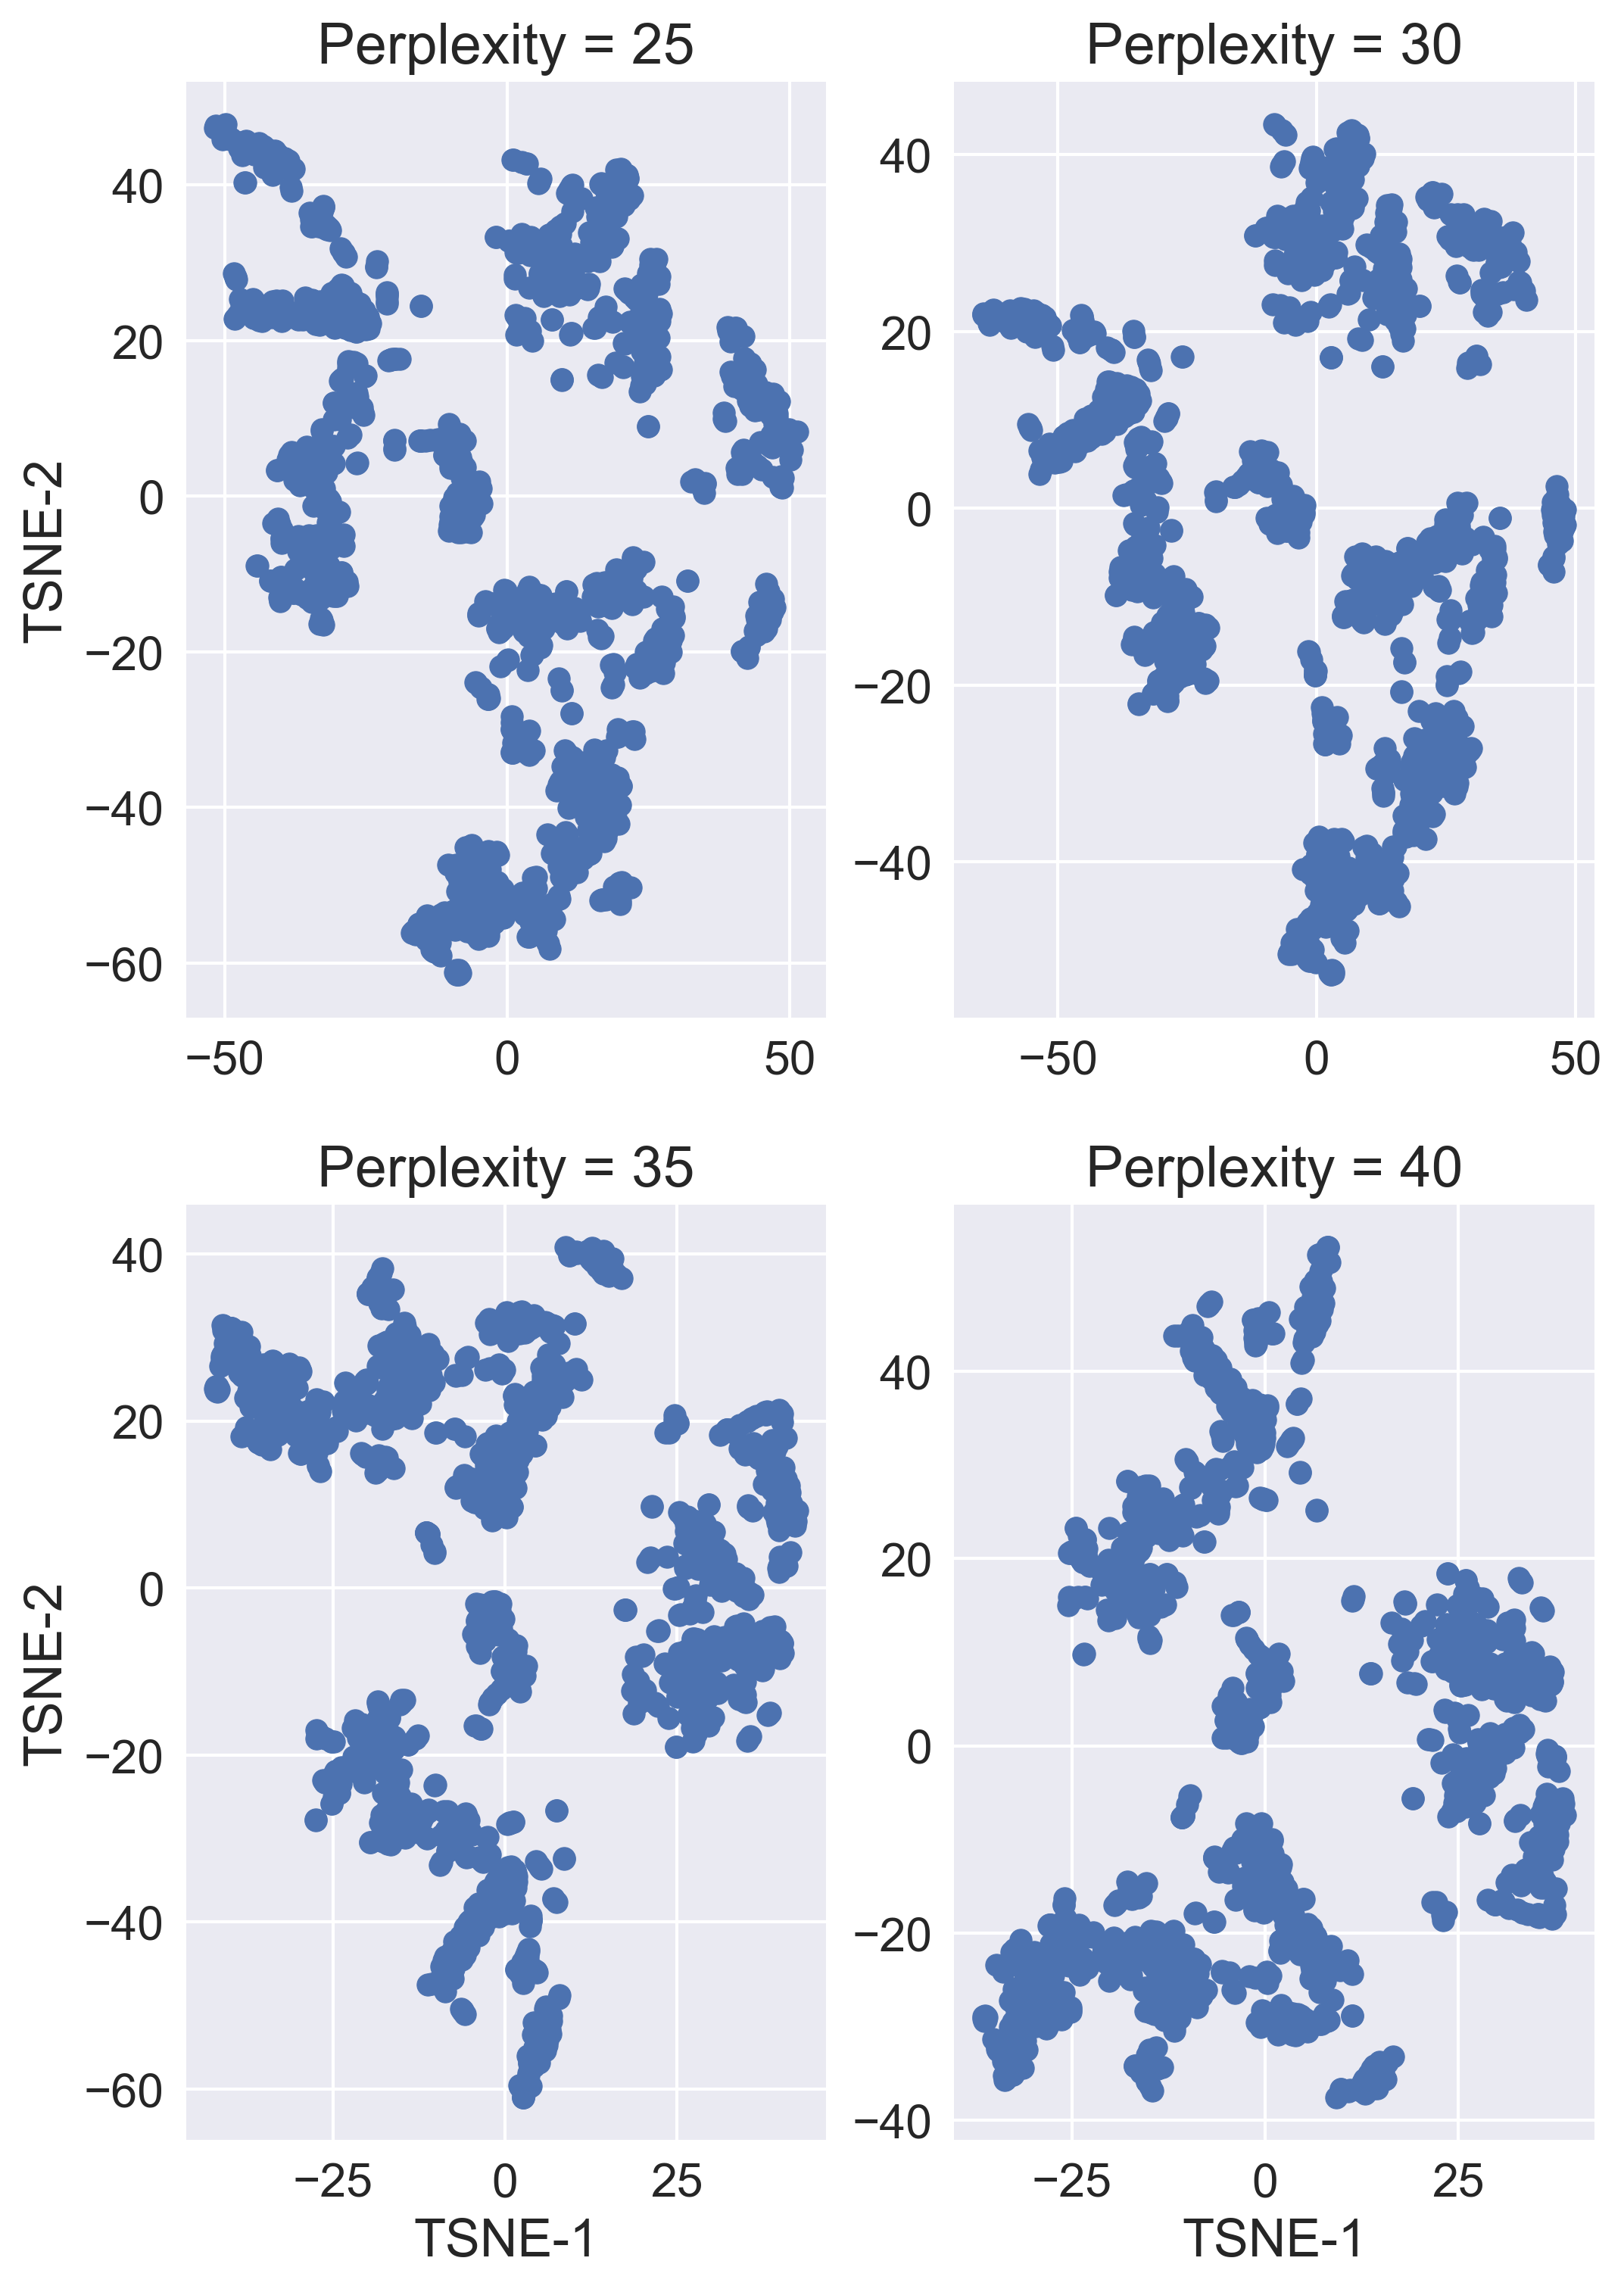

In [31]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

fig, ax = plt.subplots(2,2,figsize=(8,12),dpi=300)
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

### Repeat above with just experimental data

In [32]:
# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
313861539,-0.169249,-0.473940,-1.526790,-0.247204,-0.553882,0.078711,-1.162504,-1.508956,-0.212901,-0.511205,...,-0.639368,-0.244283,0.548828,-0.206645,-0.120591,2.661313,3.933252,3.065853,5.359894,-0.873915
313861677,-0.170241,-0.475033,-1.526012,-0.039500,0.357170,0.079028,-1.163670,-1.507926,0.035420,-0.565781,...,-0.242279,-0.058434,-0.712210,-0.012655,-0.120591,0.135773,-0.172017,0.211496,-0.154360,-0.873915
313862167,-0.170409,-0.475092,-1.527366,-0.204928,-0.415440,0.078987,-1.162743,-1.509270,-0.175456,-0.565781,...,-0.347360,-0.069105,-0.253651,-0.020143,-0.120591,0.086752,-0.172017,0.086127,-0.154360,-0.873915
313862167,7.195682,6.271247,0.173871,-0.217795,-0.597650,0.079046,-1.166949,-1.509806,-0.273996,-0.414724,...,-0.711988,-0.083516,0.692128,-0.154388,-0.120591,-0.157880,-0.172017,-0.255981,-0.154360,-0.873915
314822529,-0.170394,-0.475033,-1.526449,-0.105671,-0.597650,0.079046,-1.166949,-1.509806,-0.273996,-0.565781,...,-0.711988,-0.083516,-0.783860,0.162189,-0.120591,-0.383264,-0.172017,-0.426032,-0.154360,-0.873915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593618144,-0.170394,-0.475033,-1.526925,-0.188385,-0.473957,0.078933,-1.162458,-1.509806,-0.273996,-0.565781,...,-0.711988,-0.083516,-0.783860,-0.139475,-0.120591,-0.383264,-0.172017,-0.426032,-0.154360,-0.873915
596609577,-0.170394,-0.475033,-1.526864,-0.225147,-0.513919,0.078881,-1.162728,-1.509806,-0.273996,-0.565781,...,-0.711988,-0.083516,-0.783860,-0.137453,-0.120591,-0.383264,-0.172017,-0.426032,-0.154360,-0.873915
609435731,-0.170394,-0.475033,-1.526758,-0.210442,-0.513919,0.078899,-1.163913,-1.509806,-0.273996,-0.565781,...,-0.711988,-0.083516,-0.783860,-0.060995,-0.120591,-0.383264,-0.172017,-0.426032,-0.154360,-0.873915
609775336,-0.170065,-0.474502,-1.527142,-0.239852,-0.513919,0.078925,-1.163831,-1.509123,-0.218814,-0.487816,...,-0.195166,0.035996,-0.583240,0.838690,-0.120591,0.727491,-0.172017,0.114046,-0.154360,-0.873915


In [33]:
model_df[:] = ss.fit_transform(model_no_trans_df.values);

In [34]:
model_no_trans_df.head()

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
Cell_ID,,,,,,,,,,,,,,,,,,,,,
Hippocampus CA1 basket cell adexp,-0.170394,-0.475033,-1.527886,-0.291318,-0.597650,-0.137352,-1.155569,-1.509806,-0.273996,-0.565781,...,-0.683607,-0.083516,6.925665,-0.331191,-0.120591,-0.358202,-0.172017,-0.402422,-0.15436,-0.873915
Hippocampus CA1 basket cell fe_izhi,-0.170392,-0.475030,-1.525864,-0.032147,2.917630,0.079041,-1.163965,-1.507739,0.005858,1.804355,...,-0.033854,-0.091248,0.190579,-0.281145,-0.120591,-0.281712,-0.172017,-0.286881,-0.15436,-0.873854
Neocortex pyramidal cell layer 5-6 fe_izhi,-0.170395,-0.475044,-1.525867,-0.188385,0.591712,0.079028,-1.161898,-1.507741,-0.163631,0.635854,...,-0.104630,-0.081320,0.161919,-0.290339,-0.120591,-0.273316,-0.172017,-0.156140,-0.15436,-0.873761
Olfactory bulb (main) mitral cell adexp,-0.170394,-0.475033,-1.527886,-0.291318,-0.597650,-0.137352,-1.155569,-1.509806,-0.273996,-0.565781,...,-0.683607,-0.083516,6.925665,-0.331191,-0.120591,-0.358202,-0.172017,-0.402422,-0.15436,-0.873915
Olfactory bulb (main) mitral cell fe_izhi,-0.170396,-0.475037,-1.525865,0.160852,0.305314,0.079025,-1.163013,-1.507739,0.230530,0.871211,...,-0.135920,-0.052845,0.434188,-0.290434,-0.120591,-0.273868,-0.172017,-0.257840,-0.15436,-0.873851


In [35]:
model_df.head()

,AP12AmplitudeDropTest,AP1SSAmplitudeChangeTest,AP1AmplitudeTest,AP1WidthHalfHeightTest,AP1WidthPeakToTroughTest,AP1RateOfChangePeakToTroughTest,AP1AHPDepthTest,AP2AmplitudeTest,AP2WidthHalfHeightTest,AP2WidthPeakToTroughTest,...,ISIMedianTest,ISIBurstMeanChangeTest,SpikeRateStrongStimTest,AP1DelayMeanStrongStimTest,AP1DelaySDStrongStimTest,AP2DelayMeanStrongStimTest,AP2DelaySDStrongStimTest,Burst1ISIMeanStrongStimTest,Burst1ISISDStrongStimTest,InputResistanceTest
Cell_ID,,,,,,,,,,,,,,,,,,,,,
Hippocampus CA1 basket cell adexp,-0.644356,-0.760321,-5.647891,-0.953501,-0.761113,-0.087345,-2.437797,-5.263293,-1.976541,-0.767203,...,-0.955983,-0.388189,6.715729,-0.773187,0.0,-0.370044,-0.053535,-0.712261,-0.071907,-1.312184
Hippocampus CA1 basket cell fe_izhi,-0.644352,-0.760317,-5.642510,0.054943,4.620785,0.091930,-2.450488,-5.258120,0.187760,2.525269,...,-0.138969,-0.448827,-0.060279,-0.063559,0.0,-0.199456,-0.053535,-0.395985,-0.071907,-1.312121
Neocortex pyramidal cell layer 5-6 fe_izhi,-0.644361,-0.760332,-5.642518,-0.552984,1.059802,0.091919,-2.447363,-5.258127,-1.123014,0.902048,...,-0.227964,-0.370969,-0.089113,-0.193926,0.0,-0.180732,-0.053535,-0.038105,-0.071907,-1.312026
Olfactory bulb (main) mitral cell adexp,-0.644356,-0.760321,-5.647891,-0.953501,-0.761113,-0.087345,-2.437797,-5.263293,-1.976541,-0.767203,...,-0.955983,-0.388189,6.715729,-0.773187,0.0,-0.370044,-0.053535,-0.712261,-0.071907,-1.312184
Olfactory bulb (main) mitral cell fe_izhi,-0.644363,-0.760325,-5.642512,0.805912,0.621326,0.091916,-2.449049,-5.258120,1.925297,1.228994,...,-0.267309,-0.147676,0.184811,-0.195270,0.0,-0.181962,-0.053535,-0.316492,-0.071907,-1.312118


CPU times: user 4.35 s, sys: 207 ms, total: 4.56 s
Wall time: 4.56 s
CPU times: user 4.77 s, sys: 228 ms, total: 5 s
Wall time: 4.82 s
CPU times: user 5.53 s, sys: 293 ms, total: 5.82 s
Wall time: 5.67 s
CPU times: user 5.59 s, sys: 273 ms, total: 5.87 s
Wall time: 5.71 s


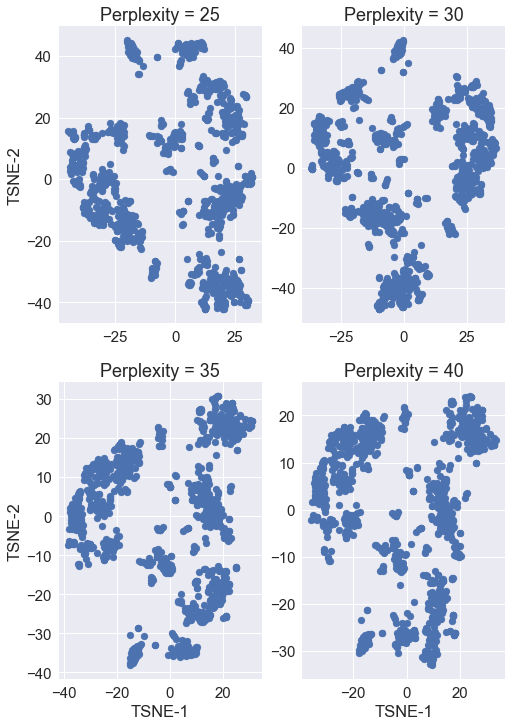

In [36]:
# PLay around with the value of perplexity. Recommended values are between 5 and 50.  
#See if any of the clusters that pop out mean anything (do they match existing cell type clusters?  
# Do they match known firnig patterns?  
# Where does the data fit in when it is also plotted in this space?)

perplexities = [25,30,35,40]

df = model_df.copy()

fig, ax = plt.subplots(2,2,figsize=(8,12))
ax = ax.ravel()

for i, perp in enumerate(perplexities):

    # init = 'pca' or 'random'
    tsne = TSNE(n_components=2,
                init='random',      
                random_state=0,
                perplexity=perp,         # default = 30, should be less than the number of samples
                n_iter=1000)             # default = 1000


    %time tsne.fit(df.values) # can't use transpose


    ax[i].scatter(*tsne.embedding_.T);

    if i in [2,3]:
        ax[i].set_xlabel('TSNE-1')

    if i in [0,2]:
        ax[i].set_ylabel('TSNE-2')
    ax[i].set_title('Perplexity = %s' %perp)

In [37]:
try:
    os.mkdir('data')
except:
    pass
filename = os.path.join(path2data,'new_cortical_ephys.csv')

model_df.to_csv(filename)

filename = os.path.join(path2data,'new_cortical_ephys_no_trans.csv')
model_no_trans_df.to_csv(filename)

filename = os.path.join(path2data,'experiment_ephys_no_trans.csv')
experiment_no_trans_df.to_csv(filename)